In [34]:
from helper_loader import *
from histalign.backend.maths import compute_origin_from_orientation

In [35]:
volume_shape = load_volume(get_atlas_path(Resolution.MICRONS_100)).shape
update_cameras(volume_shape)
update_axes(volume_shape)

array = np.zeros(shape=volume_shape, dtype=np.uint8)
array[:, (volume_shape[1] - 1) // 2, (volume_shape[2] - 1) // 2] = 1
# array[:, :, (volume_shape[2] - 1) // 2] = 1

volume = vedo.Volume(array)

In [36]:
settings = VolumeSettings(
    orientation=Orientation.CORONAL,
    resolution=Resolution.MICRONS_100,
    offset=-50,
    pitch=50,
    yaw=0,
    shape=volume_shape,
)

[ 66 124]


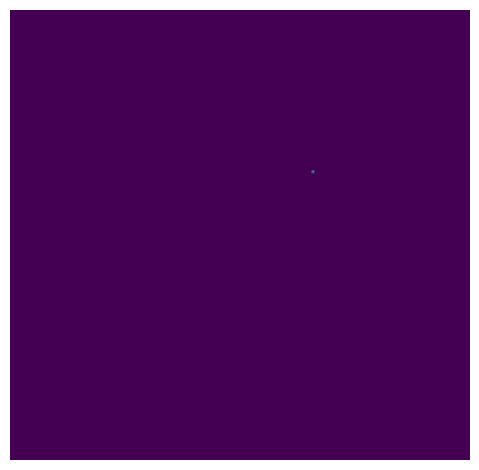

In [37]:
image = VolumeSlicer(volume=volume).slice(
    settings,
    return_mesh=False,
    autocrop=False,
    correct_rotation=False,
)

try:
    where_plane_center_ends_up = np.array(np.where(image == 1))[:, 0].flatten()
except IndexError:
    where_plane_center_ends_up = np.array(np.where(image == 1)).flatten()
print(where_plane_center_ends_up)

# image[(image.shape[0] - 1) // 2] = 2
# image[:, (image.shape[1] - 1) // 2] = 2

imshow(image, vmin=0, vmax=2)

In [38]:
image_center = (np.array(image.shape) - 1) // 2
print(image_center)

[92 94]


In [39]:
expected_centre = (np.array(settings.shape) - 1) // 2 + [1 - settings.offset, 0, 0]
plane_origin = (compute_origin_from_orientation(volume.dataset.GetCenter(), settings),)

mesh = VolumeSlicer(volume=volume).slice(settings, return_mesh=True, autocrop=False)
current_mesh_center = np.array((mesh.bounds()[1::2] + mesh.bounds()[::2]) // 2)

In [40]:
expected_centre

array([116,  39,  56])

In [41]:
current_mesh_center

array([85., 64., 56.], dtype=float32)

In [42]:
original_mesh_center = np.array(
    [
        (mesh.metadata["original_bounds"][1] + mesh.metadata["original_bounds"][0])
        // 2,
        (mesh.metadata["original_bounds"][3] + mesh.metadata["original_bounds"][2])
        // 2,
        (mesh.metadata["original_bounds"][5] + mesh.metadata["original_bounds"][4])
        // 2,
    ]
)

In [43]:
print("Offset: ", settings.offset)
print("Pitch: ", settings.pitch)
print("Yaw: ", settings.yaw)

print(
    "Plane centre distance from image centre: ",
    image_center - where_plane_center_ends_up,
)

print(
    "Mesh centre distance from expected centre: ", expected_centre - current_mesh_center
)

print("Original mesh centre: ", original_mesh_center)
print("Original mesh centre X + Y: ", original_mesh_center[0] + original_mesh_center[1])

Offset:  -50
Pitch:  50
Yaw:  0
Plane centre distance from image centre:  [ 26 -30]
Mesh centre distance from expected centre:  [ 31. -25.   0.]
Original mesh centre:  [-30.  25.   0.]
Original mesh centre X + Y:  -5.0


In [44]:
# show(
#     [
#         volume,
#         mesh,
#     ],
#     camera=coronal_camera,
# )